In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import time

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

mean_train_images = np.mean(train_images)
train_images = train_images - mean_train_images
test_images = test_images - mean_train_images

train_images = train_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]

In [0]:
datagen_training = keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    fill_mode='nearest')

datagen_training.fit(train_images)

datagen_validation = keras.preprocessing.image.ImageDataGenerator()
datagen_validation.fit(train_images)

In [0]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(64, (3,3), padding='same', input_shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(64, (3,3), padding='same', use_bias=False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.1))

model.add(keras.layers.Conv2D(128, (3,3), padding='same'))
model.add(keras.layers.Conv2D(128, (3,3), padding='same', use_bias=False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(256, kernel_initializer='random_uniform', use_bias=False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, kernel_initializer='random_uniform', use_bias=False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, kernel_initializer='random_uniform', use_bias=False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('softmax'))

my_callback = keras.callbacks.EarlyStopping(monitor='val_acc', min_delta=0, patience=15, verbose=0, mode='auto', baseline=None)

model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
start_training = time.time()
history = model.fit_generator(datagen_training.flow(train_images, train_labels, batch_size=256),
                    steps_per_epoch=len(train_images) * 0.7 / 256, epochs=120,
                    validation_data=datagen_validation.flow(train_images, train_labels, batch_size=256),
                    validation_steps=len(train_images) * 0.3 / 256,
                    callbacks = [my_callback])

end_training = time.time()
training_time = end_training - start_training
print('Total time of training: ', training_time)

start_testing = time.time()
test_loss, test_acc = model.evaluate(test_images, test_labels)
end_testing = time.time()
testing_time = end_testing - start_testing
print('Test accuracy:', test_acc)
print('Total time of testing: ', testing_time)

Epoch 1/120
165/164 [==============================] - 15s 91ms/step - loss: 1.0133 - acc: 0.7425 - val_loss: 2.1135 - val_acc: 0.2142
Epoch 2/120
165/164 [==============================] - 13s 81ms/step - loss: 0.6947 - acc: 0.8444 - val_loss: 1.0880 - val_acc: 0.7363
Epoch 3/120
165/164 [==============================] - 13s 81ms/step - loss: 0.5783 - acc: 0.8704 - val_loss: 0.5633 - val_acc: 0.8829
Epoch 4/120
165/164 [==============================] - 13s 81ms/step - loss: 0.5128 - acc: 0.8800 - val_loss: 0.3523 - val_acc: 0.9068
Epoch 5/120
165/164 [==============================] - 13s 81ms/step - loss: 0.4651 - acc: 0.8892 - val_loss: 0.3225 - val_acc: 0.9148
Epoch 6/120
165/164 [==============================] - 13s 82ms/step - loss: 0.4275 - acc: 0.8951 - val_loss: 0.3542 - val_acc: 0.8957
Epoch 7/120
165/164 [==============================] - 13s 81ms/step - loss: 0.4013 - acc: 0.8979 - val_loss: 0.2903 - val_acc: 0.9106
Epoch 8/120
165/164 [==============================] - 

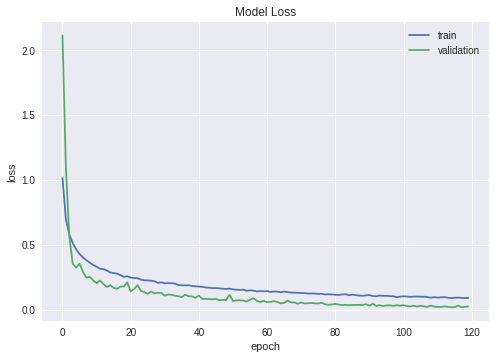

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

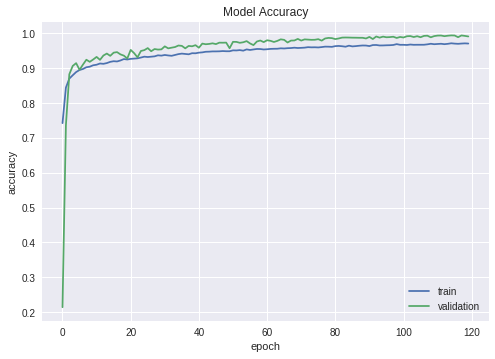

In [29]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()